<b>Dans ce notebook on ressort des éléments permettant de prendre connaissance du dataset</b>
<p><a href="https://app.mindmup.com/map/_free/2021/01/175c91405bdb11eb9f33cf002549c867">mind map du projet</a></p>

# Table of contents
1. [Load du dataset](#load)
2. [Examen de forme](#exam)
3. [Définition des mots clés](#keys)

   3.1 [Catégories de produit](#categ)
   
   3.2 [Groupes de produit](#groups)
4. [Analyse quantitative des features](#qanalyse)

   4.1 [Full NaN features](#full_nan)
   
   4.2 [Zero NaN features](#zero_nan)
   
   4.3 [Partial NaN features](#partial_nan)
   
5. [Audit du dataset](#actors)

   5.1 [Qui sont les créateurs d'information](#creators)
   
   5.2 [Quels pays sont représentés](#countries)
   
   5.3 [Quelles marques sont représentées](#brands)
   
   5.4 [Quels supermachés sont représentés](#stores)
   
   5.5 [Quelles catégories sont représentées](#categories)
   
   5.6 [Conclusion](#conclusion)
6. [Analyse qualitative](#quality)

   6.1 [Détection des features biaisées](#skewed_features)
   
   6.2 [Détection des outliers](#outliers)
   
   6.3 [Définition des données à compléter](#complete)
   
   6.4 [Identification des informations redondantes](#redund)
   
   6.5 [Identification des doublons](#duplicates)
7. [Proposition d'application](#application)

<b  style="background-color:tomato;font-size:14px;">1. LOAD DU DATASET<b>
    <a id="load"></a>    

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#On ne prend qu'un échantillon du fait des limitations mémoire de la machine
data=pd.read_csv('../dataset/en.openfoodfacts.org.products.csv',sep='\t',nrows=300000)

/home/alpro/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,12,18,19,20,21,22,26,27,28,30,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<b style="background-color:tomato;font-size:14px;">2. EXAMEN DE FORME<b>
   <a id="exam"></a>  

In [12]:
shape = data.shape
rows = shape[0]
print(shape)

(300000, 183)


In [13]:
list (data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 '

In [14]:
rows = data.shape
rows = rows[0]
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>Un examen sommaire des informations indique qu'il y a de nombreuses features peu ou pas renseignées.</p>
<p>Nous effectuerons au point 5 une analyse détaillé de cet aspect.</p>

<b  style="background-color:tomato;font-size:14px;">3. DEFINITION DES MOTS CLE<b>
    <a id="keys"></a> 

<p>Le dataset permet de catégoriser 4 grandes familles de features pour décrire un produit :</p> 
<table>
    <tr>
       <td align="center" bgcolor="red">Description</td>
        <td align="center" bgcolor="red">Type de variable</td>
        <td align="center" bgcolor="red">Exemple</td>
    </tr>    
    <tr>
        <td>Features de référencement produit</td>
        <td>Qualitative</td>
        <td>product_name: nom du produit</td>
    </tr>
    <tr>
        <td>Features de caractérisation du produit sous forme d'informations structurées</td>
        <td>Qualitative</td>
        <td>categories_tags: catégories du produit</td>
    </tr>
    <tr>
        <td>Features de composition du produit (ingrédients, additifs)</td>
        <td>Qualitative</td>
        <td>additives: liste des additifs présents dans le produit</td>
    </tr>
    <tr>
        <td>Features de détail nutritionnel du produit</td>
        <td>Quantitative</td>
        <td>vitamin-d_100g: grammage de vitamine d pour 100g de produit</td>
    </tr>

</table>    


<b style="background-color:tomato;font-size:14px;">3.1 Catégories<b>
    <a id="categ"></a> 

On s'intéresse ici aux catégories de produit définies dans le dataset

In [15]:
def count_words(df, colonne = 'categories_en'):
    list_words = set()
    for word in df[colonne].str.split(','):
        if isinstance(word, float): continue
        list_words = set().union(word, list_words)       
    print("Nb de catégories dans '{}': {}".format(colonne, len(list_words)))
    return list(list_words)
category_keys = count_words(data, 'categories_en')

Nb de catégories dans 'categories_en': 4832


Illustrons par un nuage de mots (wordcloud) les catégories qui ressortent

In [16]:
count_keyword = dict()
for index, col in data['categories_en'].iteritems():
    if isinstance(col, float): continue
    for s in col.split(','):
        if s in count_keyword.keys():
            count_keyword[s] += 1
        else:
            count_keyword[s] = 1

keyword_census = []
for k,v in count_keyword.items():
    keyword_census.append([k,v])
keyword_census.sort(key = lambda x:x[1], reverse = True)

In [17]:
from wordcloud import WordCloud, STOPWORDS

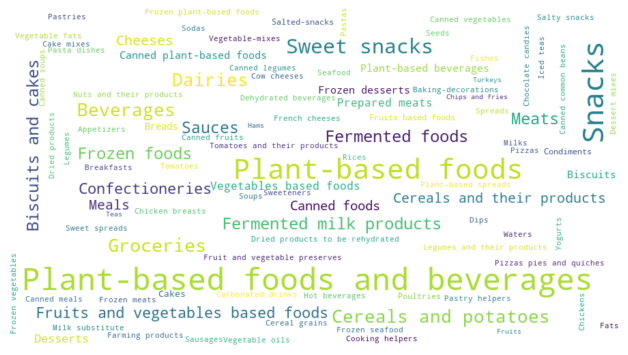

In [21]:
fig = plt.figure(1, figsize=(11,9))
ax1 = fig.add_subplot(1,1,1)
words = dict()
trunc_occurences = keyword_census[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]

wordcloud = WordCloud(width=900,height=500, background_color='white', 
                      max_words=1628,relative_scaling=0.6,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
plt.show()

En termes chiffrés: 

In [22]:
keyword_census[:5]

[['Plant-based foods and beverages', 51702],
 ['Snacks', 46799],
 ['Plant-based foods', 44798],
 ['Sweet snacks', 24305],
 ['Groceries', 20199]]

<b style="background-color:tomato;font-size:12px;">3.2 Groupes de produits<b>
    <a id="groups"></a> 

La classification des produits est portée par les deux features pnns_groups_1 et pnns_groups_2

In [23]:
pnns_group1_keys = count_words(data, 'pnns_groups_1')  
pnns_group2_keys = count_words(data, 'pnns_groups_2')

Nb de catégories dans 'pnns_groups_1': 13
Nb de catégories dans 'pnns_groups_2': 44


In [24]:
pnns_group1_keys

['Fat and sauces',
 'Cereals and potatoes',
 'Sugary snacks',
 'unknown',
 'Composite foods',
 'Salty snacks',
 'Fruits and vegetables',
 'cereals-and-potatoes',
 'Milk and dairy products',
 'Beverages',
 'fruits-and-vegetables',
 'Fish Meat Eggs',
 'sugary-snacks']

In [25]:
pnns_group2_keys

['Fruit juices',
 'Nuts',
 'Ice cream',
 'Legumes',
 'Fish and seafood',
 'Unsweetened beverages',
 'Sweets',
 'fruits',
 'vegetables',
 'Cheese',
 'Processed meat',
 'Waters and flavored waters',
 'Soups',
 'Dairy desserts',
 'unknown',
 'Biscuits and cakes',
 'Meat',
 'Artificially sweetened beverages',
 'Bread',
 'cereals',
 'Sandwiches',
 'One-dish meals',
 'Pizza pies and quiche',
 'Pizza pies and quiches',
 'Sweetened beverages',
 'Fats',
 'Chocolate products',
 'Plant-based milk substitutes',
 'Fruits',
 'Cereals',
 'Milk and yogurt',
 'Dressings and sauces',
 'Appetizers',
 'Potatoes',
 'Alcoholic beverages',
 'Dried fruits',
 'Eggs',
 'pastries',
 'Teas and herbal teas and coffees',
 'Breakfast cereals',
 'Offals',
 'Vegetables',
 'Salty and fatty products',
 'Fruit nectars']

<p>Le groupe 2 de PNNS est un détail en sous-groupes du groupe 1 de PNNS. Il apparait plus pertinent de se référer à cette définition de catégorie du produit pour le définir plus précisément.</p>
<p>On constate par ailleurs qu'il y a des regroupements possibles car les libellés sont similaires (anglais vs français, ou bien à une lettre près il s'agit de la même catégorie). On définit une nouvelle feature PNNS_3 qui va effectuer ces regroupements quand ils sont possibles et conserver la définition originale pour les lignes uniques :</p>
<table>
    <tr>
       <td align="center" bgcolor="blue">Libellé de Regroupement</td>
        <td align="center" bgcolor="blue">Catégories regroupées</td>
    </tr>    
    <tr>
        <td>Fruit juices</td>
        <td>Fruit juices,Fruit nectars</td>
    </tr>
    <tr>
        <td>Vegetables</td>
        <td>Legumes,vegetables,Vegetables</td>
    </tr>
    <tr>
        <td>Fruits</td>
        <td>fruits,Fruits</td>
    </tr>
    <tr>
        <td>Sweetened beverages</td>
        <td>Artificially sweetened beverages,Sweetened beverages</td>
    </tr>
    <tr>
        <td>Pizza pies and quiches</td>
        <td>Pizza pies and quiche,Pizza pies and quiches</td>
    </tr>
    <tr>
        <td>Cereals</td>
        <td>cereals,Cereals</td>
    </tr>
    <tr>
        <td>Nuts</td>
        <td>Nuts</td>
    </tr>
    <tr>
        <td>Ice cream</td>
        <td>Ice cream</td>
    </tr>
    <tr>
        <td>Fish and seafood</td>
        <td>Fish and seafood</td>
    </tr>
    <tr>
        <td>Unsweetened beverages</td>
        <td>Unsweetened beverages</td>
    </tr>
    <tr>
        <td>Sweets</td>
        <td>Sweets</td>
    </tr>
    <tr>
        <td>Cheese</td>
        <td>Cheese</td>
    </tr>
    <tr>
        <td>Processed meat</td>
        <td>Processed meat</td>
    </tr>
    <tr>
        <td>Waters and flavored waters</td>
        <td>Waters and flavored waters</td>
    </tr>
    <tr>
        <td>Soups</td>
        <td>Soups</td>
    </tr>
    <tr>
        <td>Dairy desserts</td>
        <td>Dairy desserts</td>
    </tr>
    <tr>
        <td>unknown</td>
        <td>unknown</td>
    </tr>
    <tr>
        <td>Biscuits and cakes</td>
        <td>Biscuits and cakes</td>
    </tr>
    <tr>
        <td>Meat</td>
        <td>Meat</td>
    </tr>
    <tr>
        <td>Bread</td>
        <td>Bread</td>
    </tr>
    <tr>
        <td>Sandwiches</td>
        <td>Sandwiches</td>
    </tr>
    <tr>
        <td>One-dish meals</td>
        <td>One-dish meals</td>
    </tr>
    <tr>
        <td>Fats</td>
        <td>Fats</td>
    </tr>
    <tr>
        <td>Chocolate products</td>
        <td>Chocolate products</td>
    </tr>
    <tr>
        <td>Plant-based milk substitutes</td>
        <td>Plant-based milk substitutes</td>
    </tr>
    <tr>
        <td>Milk and yogurt</td>
        <td>Milk and yogurt</td>
    </tr>
    <tr>
        <td>Dressings and sauces</td>
        <td>Dressings and sauces</td>
    </tr>
    <tr>
        <td>Appetizers</td>
        <td>Appetizers</td>
    </tr>
    <tr>
        <td>Potatoes</td>
        <td>Potatoes</td>
    </tr>
    <tr>
        <td>Alcoholic beverages</td>
        <td>Alcoholic beverages</td>
    </tr>
    <tr>
        <td>Dried fruits</td>
        <td>Dried fruits</td>
    </tr>
    <tr>
        <td>Eggs</td>
        <td>Eggs</td>
    </tr>
    <tr>
        <td>pastries</td>
        <td>pastries</td>
    </tr>
    <tr>
        <td>Teas and herbal teas and coffees</td>
        <td>Teas and herbal teas and coffees</td>
    </tr>
    <tr>
        <td>Breakfast cereals</td>
        <td>Breakfast cereals</td>
    </tr>
    <tr>
        <td>Offals</td>
        <td>Offals</td>
    </tr>
    <tr>
        <td>Salty and fatty products</td>
        <td>Salty and fatty products</td>
    </tr>
</table>

<b style="background-color:tomato;font-size:14px;">4. ANALYSE QUANTITATIVE DES FEATURES</b>
<a id="qanalyse"></a> 

In [27]:
percent_of_nans = data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100

Text(0.5, 1.0, 'Pourcentage de nans par feature')

<Figure size 720x360 with 0 Axes>

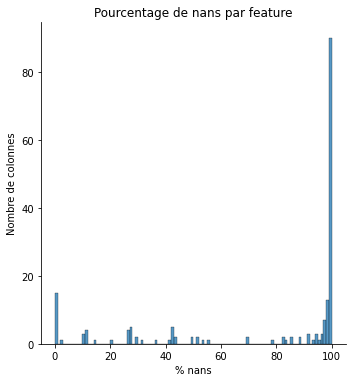

In [28]:
plt.figure(figsize=(10,5))
sns.displot(percent_of_nans, bins=100, kde=False)
plt.xlabel("% nans")
plt.ylabel("Nombre de features")
plt.title("Dispersion de nans dans les features")

<p>La mise en perspective du nombre de NaN par colonne permet de montrer :</p> 
<p>&nbsp;&nbsp;&nbsp;&nbsp;(1) que la plupart des features ne comporte aucune information (quasi 100% NaN)</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;(2) qu'il y a une part de features qui ont moins de 20% de NaN</p>
<p>
<p>Pour les features du groupe (1) on peut proposer de ne pas les conserver </p>
<p>Pour les features du groupe (2) il sera intéressant d'appliquer une méthode pour tenter de valoriser les NaN </p>

<b style="background-color:tomato;font-size:12px;">4.1 Full NaN features</b>
<a id="full_nan"></a> 

In [29]:
useless_features = percent_of_nans[percent_of_nans == 100].index
useless_features

Index(['carnitine_100g', '-montanic-acid_100g', '-maltodextrins_100g',
       '-maltose_100g', '-fructose_100g', '-glucose_100g',
       '-nervonic-acid_100g', '-erucic-acid_100g', '-mead-acid_100g',
       '-gondoic-acid_100g', '-elaidic-acid_100g', '-oleic-acid_100g',
       'omega-9-fat_100g', '-dihomo-gamma-linolenic-acid_100g',
       '-gamma-linolenic-acid_100g', '-lignoceric-acid_100g',
       'beta-carotene_100g', '-stearic-acid_100g', '-palmitic-acid_100g',
       '-myristic-acid_100g', '-lauric-acid_100g', '-capric-acid_100g',
       '-caprylic-acid_100g', '-caproic-acid_100g',
       'ingredients_that_may_be_from_palm_oil', 'ingredients_from_palm_oil',
       'additives', 'no_nutriments', 'allergens_en', 'cities', 'casein_100g',
       '-melissic-acid_100g', 'nutrition-score-uk_100g', 'water-hardness_100g',
       'chlorophyl_100g', 'beta-glucan_100g', 'glycemic-index_100g'],
      dtype='object')

<p>On remarque tout de même que sur ce groupe (1) il y a des features importantes comme la notion d'additifs, d'ingrédient dérivé d'huile de palme, ou encore de collagen extrait de la viande ce qui pourrait être une information capitale pour une personne suivant un régime vegan.</p>
<p>Avant de supprimer ces features, il me parait important de contrôler si le dataset comporte des features pouvant être porteuses de ces informations.</p>
<p>On considère ici les features principales autour de l'huile de palme, des additifs, des allergènes</p>

In [30]:
for s in ['additives','palm','allergen','additives']:
    list_columns = [col for col in data.columns if s in col]
    print(list_columns)

['additives_n', 'additives', 'additives_tags', 'additives_en']
['ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', '-palmitic-acid_100g']
['allergens', 'allergens_en']
['additives_n', 'additives', 'additives_tags', 'additives_en']


Seul allergens n'est pas porté par une autre feature. 

In [31]:
print('Nb de features qui seront supprimées: ' + str(len(useless_features)))

Nb de features qui seront supprimées: 37


<b style="background-color:tomato;font-size:12px;">4.2 Zero NaN features</b>
<a id="zero_nan"></a> 
<p>Combien de features sont toujours valorisées et quelles sont-elles ?</p>

In [32]:
zero_nan_features = percent_of_nans[percent_of_nans == 0].index

print('Nombre de features systématiquement définies: ' + str(len(zero_nan_features)))
zero_nan_features

Nombre de features systématiquement définies: 10


Index(['states_en', 'states_tags', 'states', 'last_modified_datetime',
       'last_modified_t', 'created_datetime', 'created_t', 'creator', 'url',
       'code'],
      dtype='object')

Concernant les features "states" nous ne garderons que states_tags tel qu'on l'a défini pour la méthode de suppression des features redondantes.

<b style="background-color:tomato;font-size:12px;">4.3 Partiel NaN features</b>
<a id="partial_nan"></a> 
<p>On propose une analyse par quartile pour dégager 3 groupes de features :</p>
<table>
    <tr>
       <td align="center" bgcolor="red">Groupe</td>
        <td align="center" bgcolor="red">Catégorie</td>
        <td align="center" bgcolor="red">What to do</td>
    </tr>    
    <tr>
        <td>0% - 20%</td>
        <td>Features à densité élevée</td>
        <td>Features peu biaisée et donc fiables pour une exploitation dans le cadre d'une application. Pour ces features il serait intéressant de valoriser les NaN par application de la moyenne</td>
    </tr>
    <tr>
        <td>20% - 50%</td>
        <td>Features à densité moyenne</td>
        <td>Features moyennement valorisées, qu'il faudrait soit valoriser pour qu'elles soient pertinentes dans le cadre d'une application (appliquer peut être alors un algorithme knn ?), soit éviter de faire reposer l'analyse dessus.</td>
    </tr>
    <tr>
        <td>50% - 100%</td>
        <td>Features à densité faible</td>
        <td>Ces features sont trop peu valorisées, il ne semble pas judicieux de les utiliser comme fondement pour mener une analyse</td>
    </tr>
    
</table>


In [241]:
low_nans = percent_of_nans[percent_of_nans <= 20]
middle_nans = percent_of_nans[(percent_of_nans > 20) & (percent_of_nans <= 50)]
high_nans = percent_of_nans[(percent_of_nans > 50) & (percent_of_nans < 100)]

<b>0% - 20% NaN</b>

In [242]:
def rotate_labels(axes):
    for item in axes.get_xticklabels():
        item.set_rotation(60)

Text(0, 0.5, '% de NaN ')

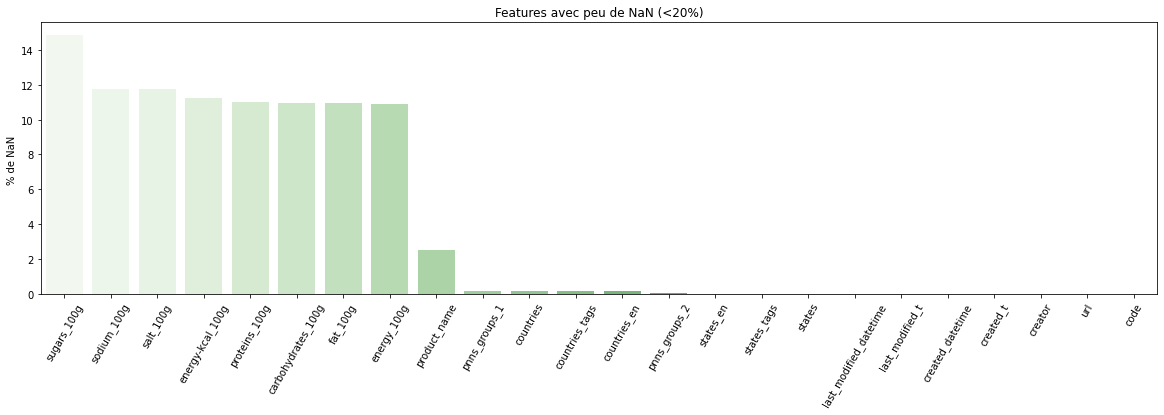

In [243]:
plt.figure(figsize=(20,5))
lows = sns.barplot(x=low_nans.index.values, y=low_nans.values, palette="Greens")
rotate_labels(lows)
plt.title("Features avec peu de NaN (<20%)")
plt.ylabel("% de NaN ")

<b>20% - 50% NaN</b>

Text(0, 0.5, '% de NaN ')

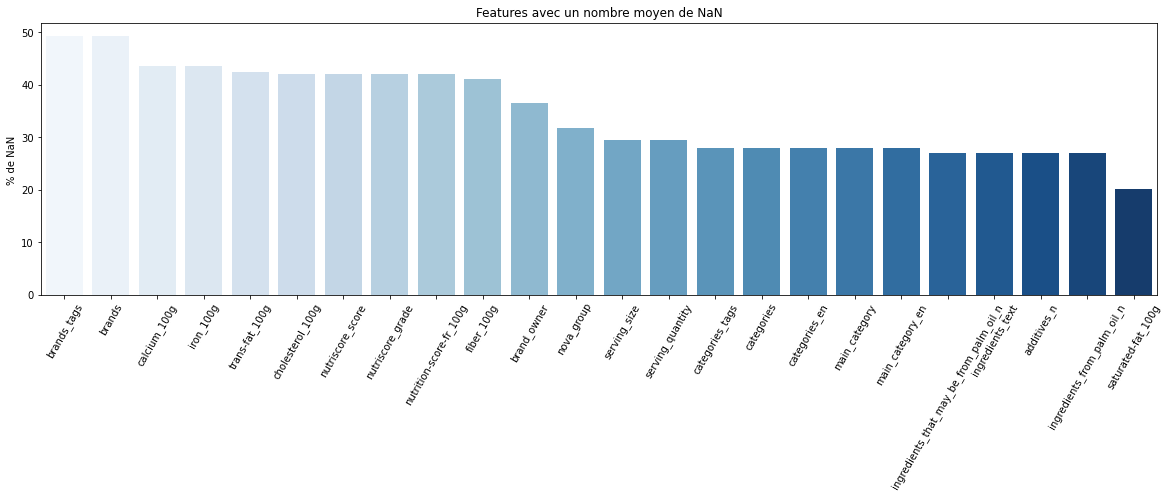

In [244]:
plt.figure(figsize=(20,5))
middle = sns.barplot(x=middle_nans.index.values, y=middle_nans.values, palette="Blues")
rotate_labels(middle)
plt.title("Features avec un nombre moyen de NaN")
plt.ylabel("% de NaN ")

Il est intéressant de remarquer que dans cette catégorie on retrouve un certain nombre de features "tags", qui sont porteuses de détails intéressants :

In [245]:
data.loc[11000,['additives_tags', 'additives_en', 'additives_n']]

additives_tags    en:e250,en:e300,en:e320,en:e321,en:e322,en:e32...
additives_en      E250 - Sodium nitrite,E300 - Ascorbic acid,E32...
additives_n                                                      11
Name: 11000, dtype: object

<b>50% - 100% NaN</b>

Text(0, 0.5, '% de NaN ')

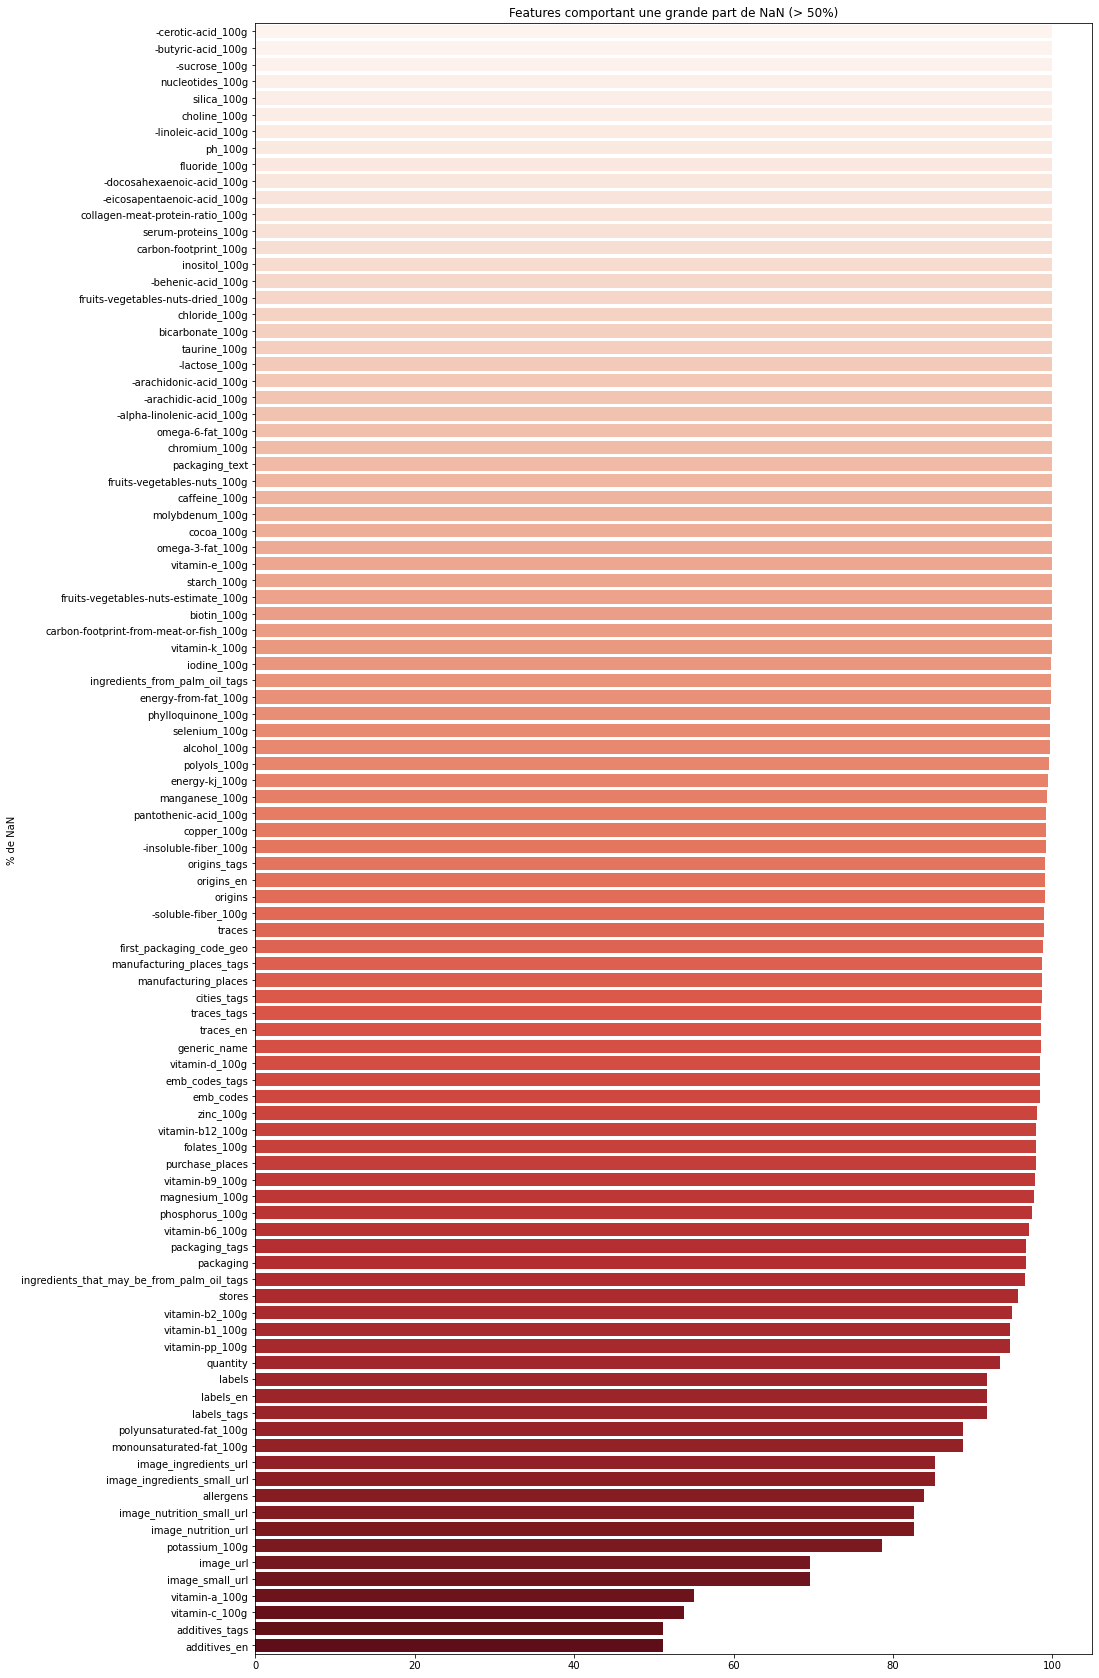

In [246]:
plt.figure(figsize=(15,30))
high = sns.barplot(y=high_nans.index.values, x=high_nans.values, palette="Reds")
plt.title("Features comportant une grande part de NaN (> 50%)")
plt.ylabel("% de NaN ")

<p>A première vue la grande partie des features entrant dans ce cas sont les détails fins d'analyse nutritionnelle (vitamines, oligo-éléments, ...). Cela peut se comprendre si l'utilisateur qui a effectué l'enregistrement soit n'en a pas connaissance car cela n'est pas répertorié sur l'étiquette du produit, soit parce que l'étape de saisie est trop fastidieuse. </p> 
</p>On constate pour ce groupe que le % de NaN est au minimum de 75%. Cela rend l'exploitation de ces features quasi impossible. Je pense que nous pouvons raisonnablement écarter ces features.<p>

<br>
<p>Parmi les éléments remarquables, on peut noter que les features suivantes ne sont jamais renseignées :</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;origine<p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;lieu de fabrication<p>    
<p>Là également on peut comprendre que cette information ne soit pas bien valorisée, mais elle met en lumière la problématique de traçabilité d'un produit.<p>

<b style="background-color:tomato;font-size:14px;">5. AUDIT DU DATASET</b>
<a id="actors"></a> 

<p>Au point précédent nous avons constaté que les informations nutritionnelles fines n'étaient quasi pas renseignées. Cela nous amène à vérifier comment sont valorisées les informations du dataset (institutions, pays, etc ...)</p>

<b style="background-color:tomato;font-size:12px;">5.1 Qui sont les créateurs d'information</b>
<a id="creators"></a> 

In [247]:
def top_n(col,col_alias,n):
    counts = data[col].value_counts()
    counts = counts.to_frame(name='nombre')
    counts['pourcentage'] = (counts['nombre']/rows)*100

    top_n = round(sum(counts[0:n]['pourcentage']),2)*100
    print("Le top " + str(n) + " des", col_alias,"cumule", str(top_n/100),"% du périmètre : \n")

    # Pie chart
    sub_df=counts.head(n)
    labels = sub_df.iloc[ : , 0 ]
    labels=labels.index
    sizes = sub_df.iloc[ : , 1 ]
    explode = tuple()
    for i in range(n):
        explode += (0.1, )

    # Creating color parameters 
    colors = ( "orange", "cyan", "brown", 
              "grey", "indigo", "beige") 

    # Wedge properties 
    wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

    # Creating autocpt arguments 
    def func(pct, allvalues): 
        absolute = int(pct / 100.*np.sum(allvalues)) 
        return "{:.1f}%".format(pct, absolute) 

    # Creating plot 
    fig, ax = plt.subplots(figsize =(10, 7)) 
    wedges, texts, autotexts = ax.pie(sizes,  
                                      autopct = lambda pct: func(pct, sizes), 
                                      explode = explode,  
                                      labels = labels, 
                                      shadow = True, 
                                      colors = colors, 
                                      startangle = 90, 
                                      wedgeprops = wp, 
                                      textprops = dict(color ="magenta")) 

    # Legend 
    ax.legend(wedges, labels, 
              title ="Contributeurs", 
              loc ="center left", 
              bbox_to_anchor =(1, 0, 0.5, 1)) 

    plt.setp(autotexts, size = 8, weight ="bold") 

    plt.show()     

Le top 5 des créateurs cumule 95.01 % du périmètre : 



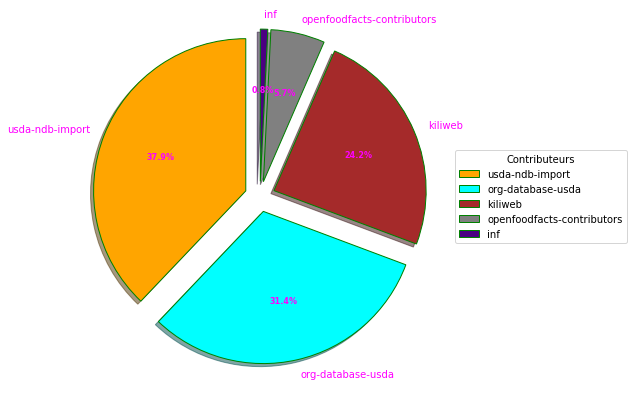

In [248]:
top_n('creator','créateurs',5)

Le principal contributeur est le département de l'agriculture américain (https://www.usda.gov/)

<b style="background-color:tomato;font-size:12px;">5.2 Quels sont les pays représentés</b>
<a id="countries"></a> 

Le top 5 des pays cumule 84.92 % du périmètre : 



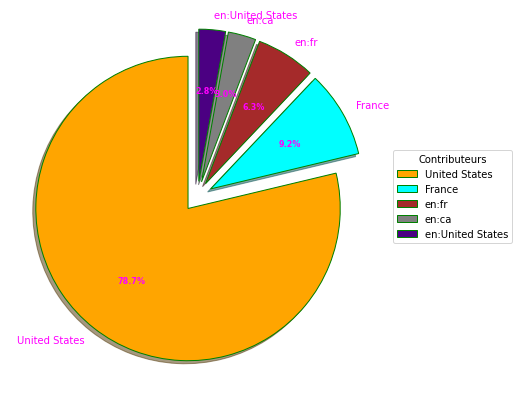

In [249]:
top_n('countries','pays',5)

<p>On retrouve principalement les Etats Unis, puis la France.</p>
<p>Dans l'idée de l'application de santé publique du ministère français il me semble approprié de ne pas conserver les données US qui présentent un biais trop important, d'autant que les produits US ne sont pas nécessairement disponibles en France.<p>

<b style="background-color:tomato;font-size:12px;">5.3 Quelles marques sont représentées</b>
<a id="brands"></a> 

Le top 10 des marques cumule 5.68 % du périmètre : 



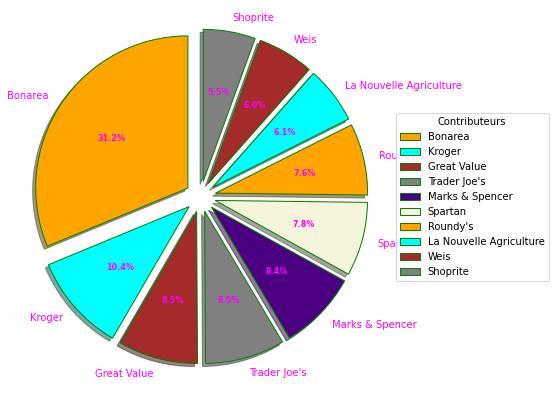

In [250]:
top_n('brands','marques',10)

Top 10 des marques en France

Quel est le top 10 des marques en France ?


Text(0.5, 1.0, 'top 10 des marques en France')

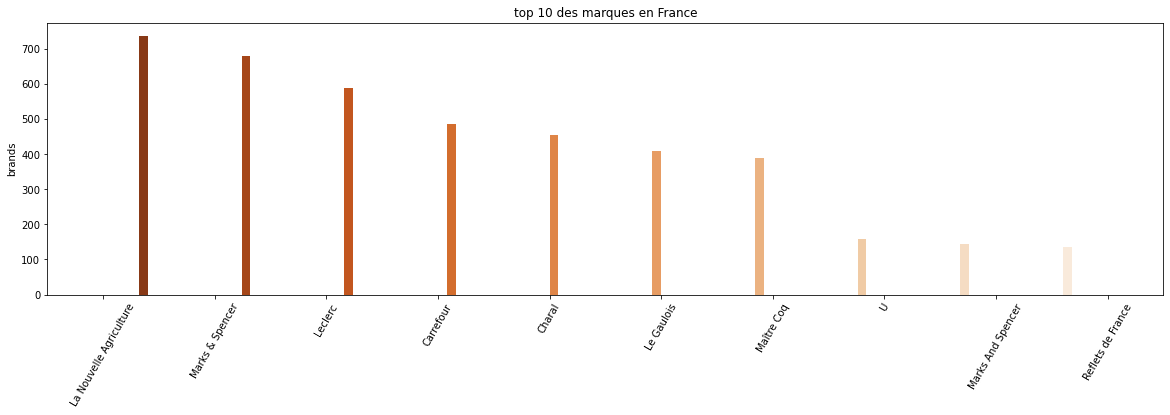

In [284]:
france = data[(data['countries']=="France") | (data['countries']=="en:FR") | (data['countries']=="en:france")]
y=france['brands'].value_counts().head(10)
x=france['brands'].value_counts().head(10).index
plt.figure(figsize=(20,5))
show = sns.barplot(x=x, y=y,hue=y, palette=("Oranges"))
rotate_labels(show)
show.legend_.remove()
plt.title("top 10 des marques en France")

<b style="background-color:tomato;font-size:12px;">5.4 Quels supermachés sont représentés</b>
<a id="stores"></a> 

Le top 10 des Supermarchés tous pays confondus cumule 2.79 % du périmètre : 



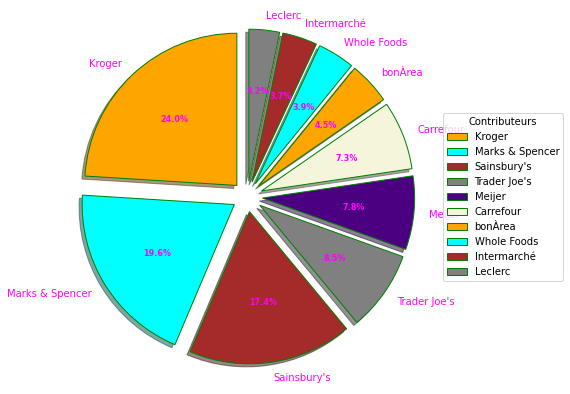

In [238]:
top_n('stores','Supermarchés tous pays confondus',10)

Top 10 des supermarchés en France

Text(0.5, 1.0, 'top 10 des supermarchés en France')

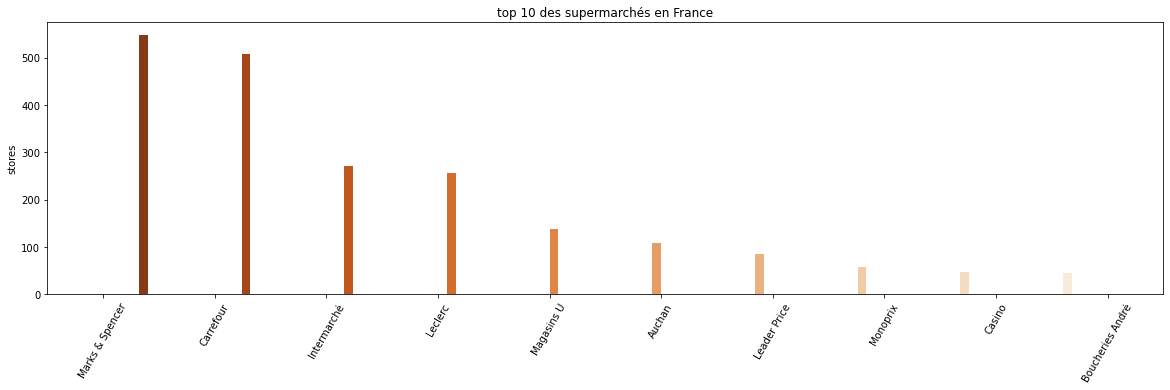

In [286]:
france = data[(data['countries']=="France") | (data['countries']=="en:FR") | (data['countries']=="en:france")]
y=france['stores'].value_counts().head(10)
x=france['stores'].value_counts().head(10).index
plt.figure(figsize=(20,5))
show = sns.barplot(x=x, y=y,hue=y, palette=("Oranges"))
rotate_labels(show)
show.legend_.remove()
plt.title("top 10 des supermarchés en France")

<b style="background-color:tomato;font-size:12px;">5.5 Quelles catégories sont représentées</b>
<a id="categories"></a> 

                       Quelles sont les catégories les plus représentées ?


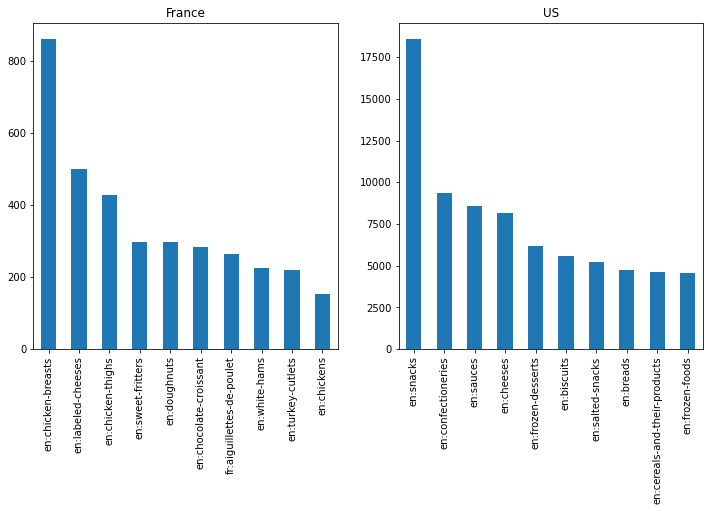

In [240]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fr_values = france['main_category'].value_counts()
us_values = us['main_category'].value_counts()
fr_values[0:10].plot(kind='bar', ax=ax1, title="France")
us_values[0:10].plot(kind='bar', ax=ax2, title="US")
print('                       Quelles sont les catégories les plus représentées ?')
plt.show()

<b style="background-color:tomato;font-size:12px;">5.6 Conclusion</b>
<a id="conclusion"></a> 

Ajouter une conclusion....

<b style="background-color:tomato;font-size:14px;">6. ANALYSE QUALITATIVE</b>
<a id="quality"></a> 

<b style="background-color:tomato;font-size:12px;">6.1 Détection des features biaisées</b>
<a id="skewed_features"></a> 

<AxesSubplot:title={'center':'Représentativité des features dans le dataset'}>

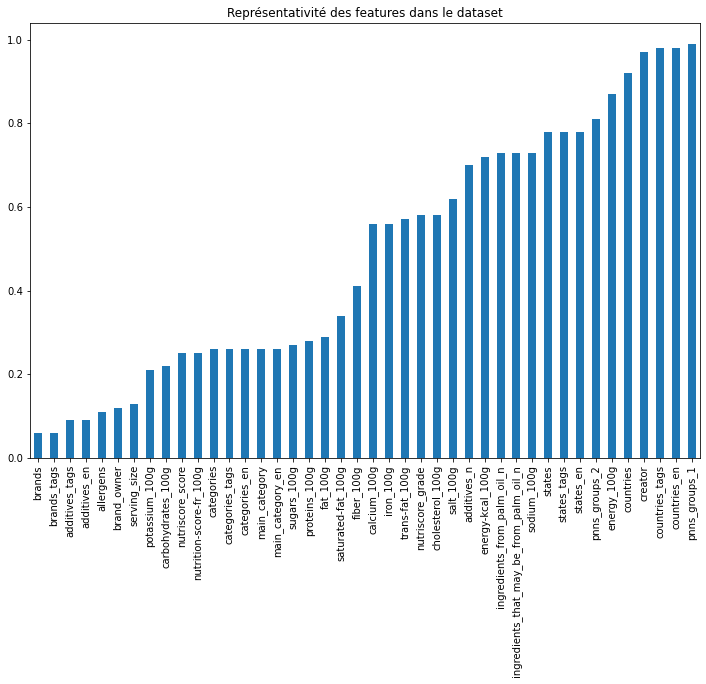

In [220]:
columns = data.columns
over_skewed={}

for c in columns:
    try:
        counts = data[c].value_counts()
        counts = counts.to_frame(name='nb')
        counts['pourcentage'] = counts['nb']/rows
        pct = round(sum(counts[0:10]['pourcentage']),2)
        if pct > 0.05:
            over_skewed[c] = pct
    except:
        i=1
t = dict(sorted(over_skewed.items(), key=lambda item: item[1]))
unusual_df = pd.DataFrame.from_dict(t, orient='index')
unusual_df.plot(kind='bar', figsize=(12,8), title="Représentativité des features dans le dataset", legend=False)

<p>Cela montre le déséquilibre qu'il y a dans le dataset entre certaines features très bien valorisées, d'autres beaucoup moins, voire pas du tout.</p>
<p>Par ailleurs cela confirme les features qui ont fait l'objet du point 6 et qui indiquent que l'alimentation du dataset reste essentiellement axée sur des données générales.</p> 

<b style="background-color:tomato;font-size:12px;">6.2 Détection des outliers<b>
    <a id="outliers"></a> 

On vérifie la présence d'outliers dans les différentes features porteuses d'information nutritionnelle. L'idée est d'évaluer la cohérence portée par celles-ci et d'avoir une idée du travail d'ajustement nécessaire.
Pour établir une règle générale on procède à un échantillonage sur le périmètre de ces features. On défira alors le seuil le plus approprié. 

In [1]:
quantite = ['energy_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-pp_100g',
            'vitamin-b6_100g','vitamin-b9_100g','pantothenic-acid_100g', 'biotin_100g',
            'salt_100g','fat_100g','fiber_100g','sugars_100g']

In [222]:
sigma = [0 for _ in range(len(quantite))]
mediane = [0 for _ in range(len(quantite))]
for i in range(len(quantite)):
    colonne = quantite[i]
    mediane[i] = data[pd.notnull(data[colonne])][colonne].median()
    test = data[pd.notnull(data[colonne])][colonne]
    test = test.sort_values()    
    sigma[i] = np.std(test[:-25])    

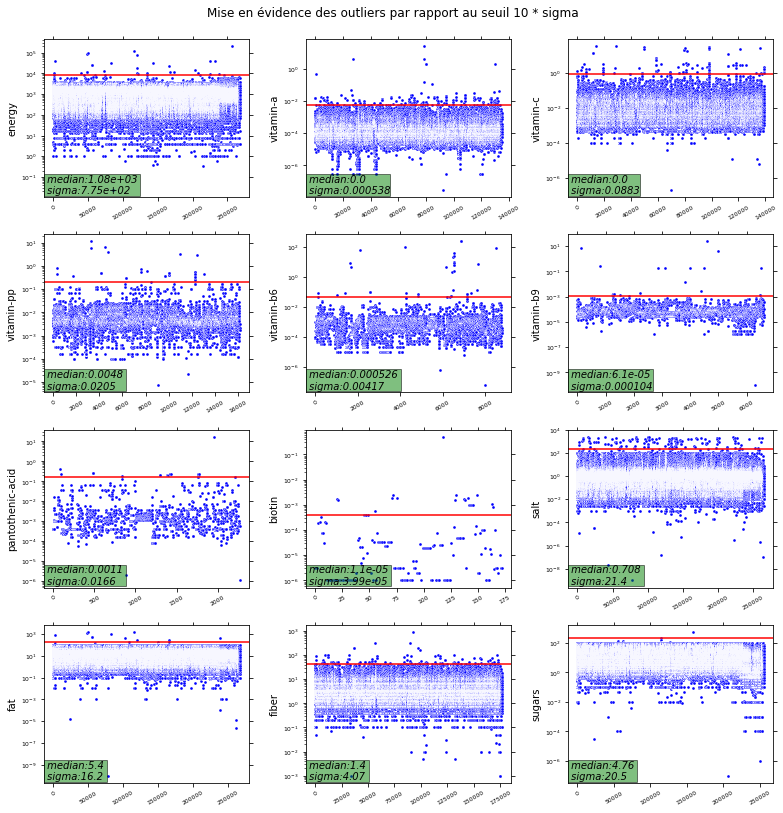

In [223]:
tPlot, axes = plt.subplots(nrows=4, ncols=3, sharex=False, sharey=False, figsize=(11,11))
axes = np.array(axes)
sigma_factor = 10
i=0
for ax in axes.reshape(-1):
    colonne = quantite[i]
    test = data[pd.notnull(data[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=6)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 10)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=mediane[i] + sigma_factor*sigma[i], color='r', linestyle='-')
    
    ax.text(0., 0.02, ' median:{:.3} \n sigma:{:.3}'.format(mediane[i], sigma[i]),
            style='italic', transform=ax.transAxes, fontsize = 10,
            bbox={'facecolor':'green', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, "Mise en évidence des outliers par rapport au seuil " + str(sigma_factor) + " * sigma", ha='center', fontsize = 12)
plt.tight_layout()

Après plusieurs ajustements du facteur de déviation standard des valeures de feature par rapport à la médiane on arrive à un bon compromis avec 10 sigma. 
On va donc retenir cette valeur pour écarter les outliers dans nos traitements de cleaning en définissant que si une valeur de feature dépasse de 10 sigma la valeur médiane de cette feature on l'écarte du dataset, à la condition que la valeur apparemment en outling ne soit pas portée par un seul ingrédent (comme par exemple le sel).  

<b style="background-color:tomato;font-size:12px;">6.3 Définition des données à compléter<b>
    <a id="complete"></a> 

Dans l'optique d'une application de santé publique on s'appuyera nécessairement sur les qualités intrinsèques du produit. Ces qualités sont portées par les features quantitatives. On propose donc de partir du périmètre des features quantitatives dont on va analyser la densité de contenu. Pour celles dont la densité est comprise dans la fourchette de 75% à 100% on proposera de les valoriser par une méthode de régression (point développé dans le notebook de clean).  

In [300]:
to_be_completed = percent_of_nans[(percent_of_nans < 25) & (percent_of_nans > 0)]
to_be_completed_high_density = to_be_completed.filter(like='_100g')
to_be_completed_high_density

saturated-fat_100g    20.186000
sugars_100g           14.838333
sodium_100g           11.732333
salt_100g             11.732333
energy-kcal_100g      11.239000
proteins_100g         11.009667
carbohydrates_100g    10.977667
fat_100g              10.960667
energy_100g           10.866333
dtype: float64

Pour celles dont la densité est comprise dans la fourchette de 50% à 75% on proposera de les valoriser par application de la valeur médiane.

In [301]:
to_be_completed = percent_of_nans[(percent_of_nans < 50) & (percent_of_nans >= 25 )]
to_be_completed_average_density = to_be_completed.filter(like='_100g')
to_be_completed_average_density

calcium_100g               43.698000
iron_100g                  43.519333
trans-fat_100g             42.419667
cholesterol_100g           42.141333
nutrition-score-fr_100g    42.078000
fiber_100g                 41.179333
dtype: float64

<b style="background-color:tomato;font-size:12px;">6.4 Identification des informations redondantes<b>
    <a id="redund"></a> 

On remarque à première vue que la liste de features comporte des noms redondants.
Ex: categories, categories_en, categories_tag

In [302]:
list_columns = ['categories', 'categories_tags', 'categories_en']
data[data[list_columns].notnull().any(axis=1)][['product_name']+ list_columns][:20:3]

,product_name,categories,categories_tags,categories_en
3,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards"
13,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso..."
33,Aiguillettes de poulet,"Viandes, Volailles, Poulets, Aiguillettes de p...","en:meats,en:poultries,en:chickens,fr:aiguillet...","Meats,Poultries,Chickens,fr:Aiguillettes de po..."
60,Abondance,"Produits laitiers, Produits fermentés, Produit...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."
66,BAguette bressan,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
72,Le rogallais chèvre brebis,en:cheeses,"en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."
85,Miel de printemps,"Miels, Miels de Printemps","en:spreads,en:breakfasts,en:bee-products,en:fa...","Spreads,Breakfasts,Bee products,Farming produc..."


<p>Dans la phase de cleaning on ne conservera que les features '_tags' pour permettre une exploitation des informations (notamment l'association langue:terme)</p>

<b style="background-color:tomato;font-size:12px;">6.5 Identification des doublons<b>
    <a id="duplicates"></a> 

In [303]:
duplicates = []
for i,dup in enumerate(data.duplicated(subset=(['product_name','creator']))):
    if dup: 
        s = data["product_name"][i]
        if not pd.isna(s):
            r = [s,data["creator"][i]]
            duplicates.append(r)
len(duplicates)            

82463

In [304]:
duplicates[0:10]

[['Baguette Poitevin', 'kiliweb'],
 ['Baguette Niçois', 'kiliweb'],
 ['Compote de poire', 'kiliweb'],
 ['Peanuts', 'usda-ndb-import'],
 ['Vitória crackers', 'kiliweb'],
 ['Miel', 'kiliweb'],
 ['Colorant alimentaire', 'kiliweb'],
 ['Glaçage fondant', 'kiliweb'],
 ["Pate d'amandes", 'kiliweb'],
 ['Colorant alimentaire', 'kiliweb']]

In [305]:
data.loc[(data['product_name'] == "Miel") & (data['creator'] == "kiliweb")]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
312,000000015710,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1579799939,2020-01-23T17:18:59Z,1607510430,2020-12-09T10:40:30Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,0000006638108,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1538567933,2018-10-03T11:58:53Z,1538567952,2018-10-03T11:59:12Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,0000485,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1578399617,2020-01-07T12:20:17Z,1607440861,2020-12-08T15:21:01Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2694,0007700026200,http://world-en.openfoodfacts.org/product/0007...,kiliweb,1575800220,2019-12-08T10:17:00Z,1575809423,2019-12-08T12:50:23Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20326,0014051000001,http://world-en.openfoodfacts.org/product/0014...,kiliweb,1540196337,2018-10-22T08:18:57Z,1552297049,2019-03-11T09:37:29Z,Miel,NaN,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141506,0055562112302,http://world-en.openfoodfacts.org/product/0055...,kiliweb,1602345215,2020-10-10T15:53:35Z,1602345217,2020-10-10T15:53:37Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142425,0055828375045,http://world-en.openfoodfacts.org/product/0055...,kiliweb,1604798487,2020-11-08T01:21:27Z,1604798493,2020-11-08T01:21:33Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143899,57449003161,http://world-en.openfoodfacts.org/product/0057...,kiliweb,1550099302,2019-02-13T23:08:22Z,1550099304,2019-02-13T23:08:24Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145444,58500000211,http://world-en.openfoodfacts.org/product/0058...,kiliweb,1593958334,2020-07-05T14:12:14Z,1593958335,2020-07-05T14:12:15Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154557,63829150080,http://world-en.openfoodfacts.org/product/0063...,kiliweb,1553947512,2019-03-30T12:05:12Z,1580281068,2020-01-29T06:57:48Z,Miel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sur cet exemple on comprend que pour un produit donné et un contributeur donné on a plusieurs entrées sans pouvoir définir laquelle pourrait être gardée. En effet il n'y a pas de critère évident qui permettrait d'affiner la sélection pour ne retenir que le plus pertinent (comme la date de dernière modification qui pourrait signifier que les données de la ligne ont été mises à jour avec de meilleures données).
En l'état nous ne projetons pas de traiter les doublons.

In [311]:
del data
del percent_of_nans
del unusual_df
del to_be_completed
del to_be_completed_high_density
del to_be_completed_average_density

<b style="background-color:tomato;font-size:14px;">7. PROPOSITION D'APPLICATION<b>
    <a id="application"></a> 


<p>Les objectifs affichés du Ministère de Santé Publique en matière de pratiques alimentaires sont clairement définis dans la rubrique Recommandations de son site lié à la nutrition : <a href="https://www.mangerbouger.fr/">site mangerbouger</a></p>
<p>Ces recommandations ciblent des catégories de produits pour lesquelles le Ministère définit une tendance à les intégrer dans les repas (Augmenter, Aller vers, Réduire)</p>
<p>Il serait donc intéressant de concevoir une application qui permettrait d'illuster les bienfaits de l'application de ces recommandations.</p>
<p>L'application devrait montrer l'impact du nutriscore global du repas quand une part des ingrédients est modifiée en fonction de ces recommandations.</p>
